## Introduction to Data Science Project

- **Problem Description:** This study aims to predict employee attrition using the IBM Human Resources Analytics dataset. Factors affecting employee engagement will be analyzed by considering variables such as employee demographics, job satisfaction, salary level, promotion history, and tenure.

- **Summary of the dataset to be used in the study:** The dataset contains a total of 35 features. These features include data on employees' personal information, work experience, performance levels, and workplace satisfaction.

- **Dataset:** https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

**Machine Learning Algorithms and Evaluation Methods**
- **Machine Learning Algorithms:**

- **Logistic Regression:** This is a simple yet effective model typically used for binary classification problems. The model assumes a linear relationship between the input variables and the target variable and generates the outcome as a probability value for each class. To predict whether employees will leave, it creates a decision boundary based on employee characteristics (age, salary, job satisfaction, etc.).
- **K-Nearest Neighbors (KNN) Classifier:** K-Nearest Neighbors (KNN) classifies each data point by considering the class of its K nearest neighbors. In other words, given a new sample of data, the model compares that sample to its nearest neighbors and predicts its class based on these neighbors. KNN can be particularly effective in situations where relationships are non-linear and predictions must be made based on data similarities.
- **Random Forest Classifier:** Random Forest is an ensemble model consisting of multiple decision trees, and each decision tree is trained on different subsets of the dataset. The final result (voting) is obtained by combining the predictions of all trees. This model is capable of learning complex interactions of features and minimizes the problem of overfitting. It tends to provide high accuracy, especially on large and complex datasets.

**Evaluation Methods:**
- **Hold-Out Validation:** This is a simple validation method that evaluates model performance by splitting a dataset into training and testing.
- **We will use the following evaluation metrics in our project:**
Accuracy, Precision, Recall, F1-Score

In [2]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

In [3]:
# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/ebrarkipoglu/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1


In [6]:
csv_file = path + "/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(csv_file)

In [8]:
# show the first 20 rows of the data
df.head(20)

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Travel_Rarely        670  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
14   28       Yes      Travel_Rarely        103  Research & Development   
15   29        No      Travel_Rarely       1389  Research & Development   
16   32        No      Travel_Rarely        334  Research & Development   
17   22        No         Non-Travel       1123  Research & Development   
18   53        No      Travel_Rarely       1219                   Sales   
19   38        No      Travel_Rarely        371  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                  1          2  Life Sciences              1               1   
1                  8          1  Life Sciences              1               2   
2                  2          2          Other              1               4   
3                  3          4  Life Sciences              1               5   
4                  2          1        Medical              1               7   
5                  2          2  Life Sciences              1               8   
6                  3          3        Medical              1              10   
7                 24          1  Life Sciences              1              11   
8                 23          3  Life Sciences              1              12   
9                 27          3        Medical              1              13   
10                16          3        Medical              1              14   
11                15          2  Life Sciences              1              15   
12                26          1  Life Sciences              1              16   
13                19          2        Medical              1              18   
14                24          3  Life Sciences              1              19   
15                21          4  Life Sciences              1              20   
16                 5          2  Life Sciences              1              21   
17                16          2        Medical              1              22   
18                 2          4  Life Sciences              1              23   
19                 2          3  Life Sciences              1              24   

    ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0   ...                         1            80                 0   
1   ...                         4            80                 1   
2   ...                         2            80                 0   
3   ...                         3            80                 0   
4   ...                         4            80                 1   
5   ...                         3            80                 0   
6   ...                         1            80                 3   
7   ...                         2            80                 1   
8   ...                         2            80                 0   
9   ...                         2   

In [10]:
# show the last 20 rows of the data
df.tail(20)

Age Attrition     BusinessTravel  DailyRate              Department  \
1450   35        No      Travel_Rarely       1146         Human Resources   
1451   38        No      Travel_Rarely        345                   Sales   
1452   50       Yes  Travel_Frequently        878                   Sales   
1453   36        No      Travel_Rarely       1120                   Sales   
1454   45        No      Travel_Rarely        374                   Sales   
1455   40        No      Travel_Rarely       1322  Research & Development   
1456   35        No  Travel_Frequently       1199  Research & Development   
1457   40        No      Travel_Rarely       1194  Research & Development   
1458   35        No      Travel_Rarely        287  Research & Development   
1459   29        No      Travel_Rarely       1378  Research & Development   
1460   29        No      Travel_Rarely        468  Research & Development   
1461   50       Yes      Travel_Rarely        410                   Sales   
1462   39        No      Travel_Rarely        722                   Sales   
1463   31        No         Non-Travel        325  Research & Development   
1464   26        No      Travel_Rarely       1167                   Sales   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1450                26          4  Life Sciences              1   
1451                10          2  Life Sciences              1   
1452                 1          4  Life Sciences              1   
1453                11          4      Marketing              1   
1454                20          3  Life Sciences              1   
1455                 2          4  Life Sciences              1   
1456                18          4  Life Sciences              1   
1457                 2          4        Medical              1   
1458                 1          4  Life Sciences              1   
1459                13          2          Other              1   
1460                28          4        Medical              1   
1461                28          3      Marketing              1   
1462                24          1      Marketing              1   
1463                 5          3        Medical              1   
1464                 5          3          Other              1   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1450            2040  ...                         3            80   
1451            2041  ...                         3            80   
1452            2044  ...                         4            80   
1453            2045  ...                         1            80   
1454            2046  ...                         3            80   
1455            2048  ...                         4            80   
1456            2049  ...                         4            80   
1457            2051  ...                         2            80   
1458            2052  ...                         4            80   
1459            2053  ...                         1            80   
1460            2054  ...                         2            80   
1461            2055  ...                         2            80   
1462            2056  ...                         1            80   
1463          

In [12]:
# 1470 rows
len(df)

1470

In [14]:
# 35 features
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
# size of dataset(row-column)
df.shape

(1470, 35)

In [18]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [20]:
pd.Series(df.dtypes).value_counts()

int64     26
object     9
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
# To separate categorical and numeric variables:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object') 

In [26]:
print("Numeric variables:", numerical.columns.tolist())

Numeric variables: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [28]:
numerical.head(3)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  

[3 rows x 26 columns]

In [30]:
print("Categorical variables:", categorical.columns.tolist())

Categorical variables: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [32]:
categorical.head(3)

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes

In [34]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [36]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [38]:
df[categorical.columns].describe().T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [40]:
df.nunique() #how many different values there are for the relevant attribute 

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [42]:
df.BusinessTravel.unique() # What data is there for the BusinessTravel feature, for example there are 3 different types

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [44]:
df.isna().sum().sort_values(ascending=False) #the sum of how much missing data there is for each feature in the data set.
#No missing values in the data set comment

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [46]:
import seaborn as sns

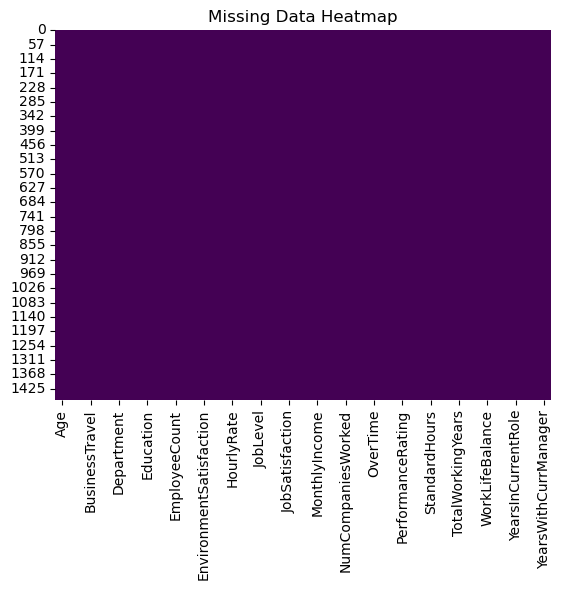

In [48]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()
# Comment: No missing data

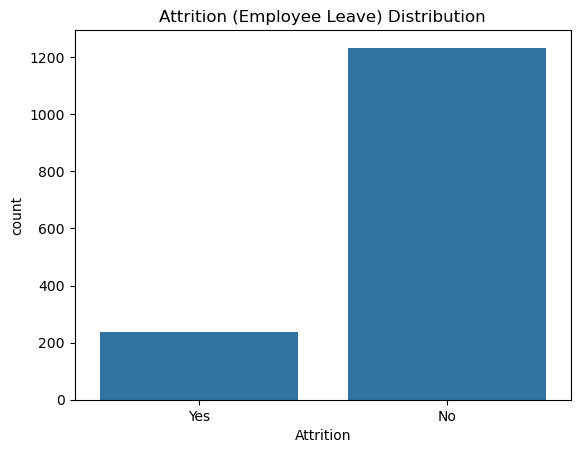

In [50]:
sns.countplot(data=df, x='Attrition')
plt.title('Attrition (Employee Leave) Distribution')
plt.show()

### What is the relationship between Attrition and Age?

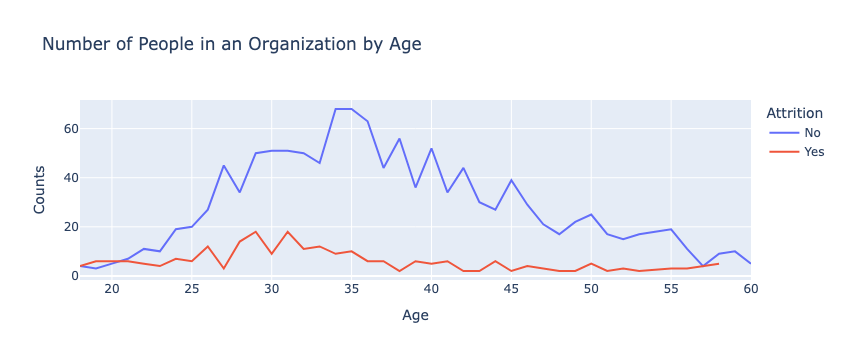

In [53]:
age_att = df.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')

px.line(age_att, x='Age', y='Counts', color='Attrition',
        title='Number of People in an Organization by Age')

- **Explanation:** The attrition rate is highest between the ages of 28 and 32. After this age, the rate decreases as employees seek stability. Between the ages of 18 and 20, employees are in the discovery phase, so the likelihood of leaving is high.

### What is the impact of income on employee turnover?

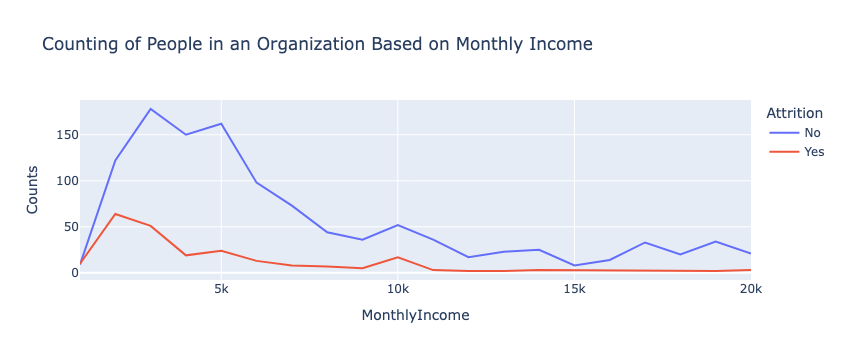

In [57]:
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Maaşları yuvarlama(1000 e)
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)

rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')
fig = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition', title='Counting of People in an Organization Based on Monthly Income')
fig.show()


- **Explanation:** As the graph shows, the dropout rate is high at lower income levels (less than 5,000) and decreases as income increases. A small increase is observed around 10,000, indicating a middle-class pursuit of improving livelihoods and living standards. At higher incomes, the dropout rate drops significantly.

### Do departments have an impact on turnover?

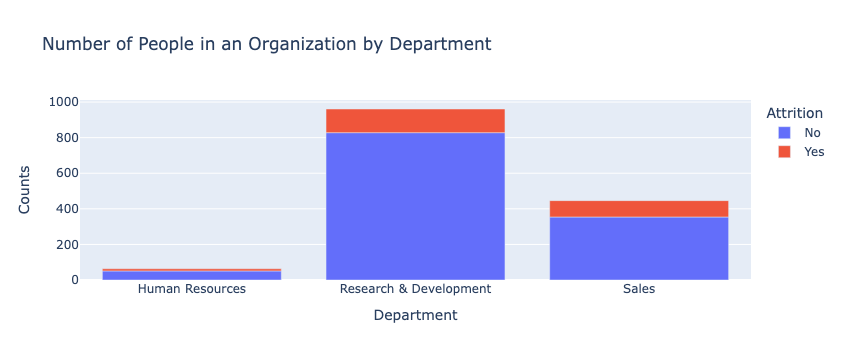

In [61]:
dept_att = df.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

fig = px.bar(dept_att, x='Department', y='Counts', color='Attrition', title='Number of People in an Organization by Department')
fig.show()

- **Explanation:** The data covers three main departments. Sales has the highest churn rate at 25.84%, followed by Human Resources at 19.05%. Research and Development has the lowest churn rate at 13.83%, indicating a more stable department.

### What Impact Does Personal Job Satisfaction Have on Turnover Rate?

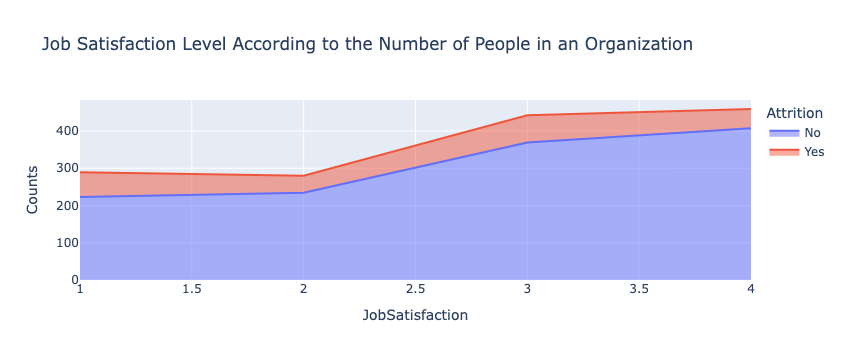

In [65]:
jsats_att = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Counts')
px.area(jsats_att, x='JobSatisfaction', y='Counts', color='Attrition', title='Job Satisfaction Level According to the Number of People in an Organization')

- **Explanation:** As job satisfaction increases, the turnover rate decreases. While turnover decreases from 1 to 2, it increases again between 2 and 3 due to the search for better opportunities.

### How Does Work Experience Impact Attrition?

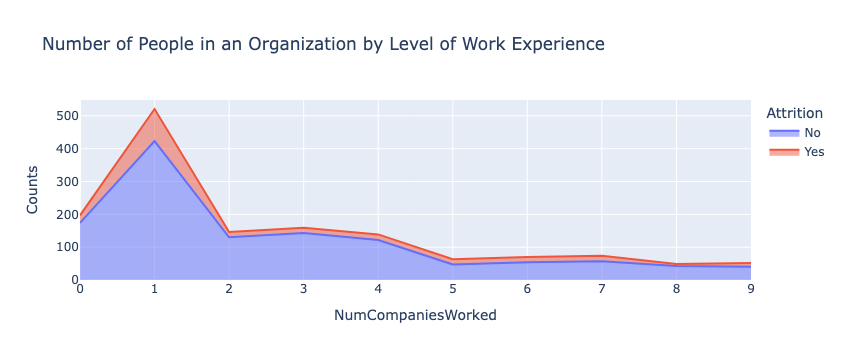

In [69]:
ncwrd_att = df.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')
px.area(ncwrd_att, x='NumCompaniesWorked', y='Counts', color='Attrition', title='Number of People in an Organization by Level of Work Experience ')

- **Explanation:** As the chart shows, employees at the beginning of their careers are more likely to change jobs. Those with more company experience tend to stay with their current company.

### How Does Tenure in the Same Role Relate to Turnover Rate?

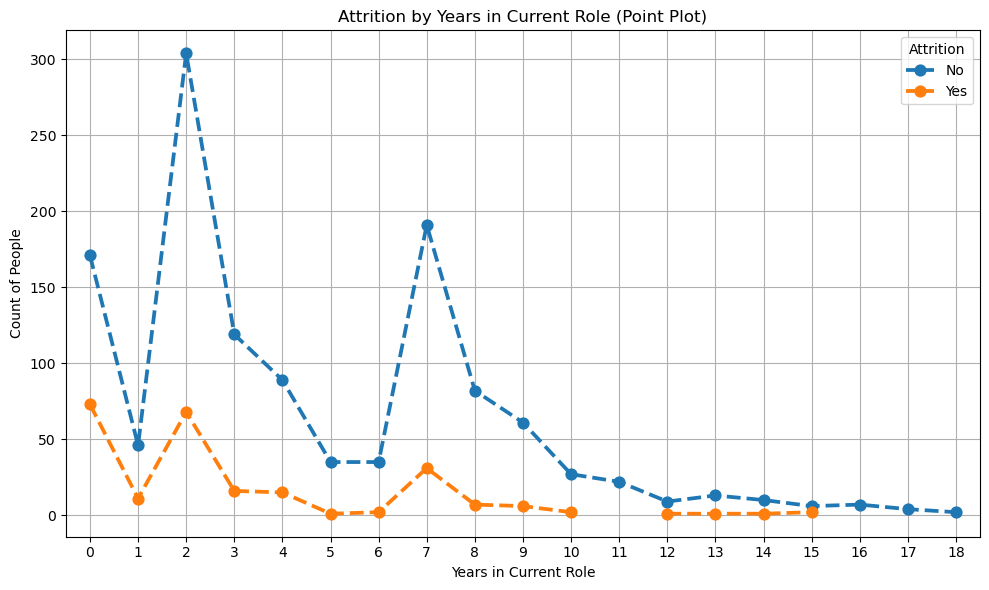

In [73]:
yrscr_att = df.groupby(['YearsInCurrentRole', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

plt.figure(figsize=(10, 6))
sns.pointplot(data=yrscr_att, x='YearsInCurrentRole', y='Counts', hue='Attrition', markers='o', linestyles='--')

plt.title('Attrition by Years in Current Role (Point Plot)')
plt.xlabel('Years in Current Role')
plt.ylabel('Count of People')
plt.legend(title='Attrition')
plt.grid(True)
plt.tight_layout()
plt.show()

- **Explanation:** The graph shows that turnover is high in the first two years, while employee engagement increases in years 2 and 7. After year 5, the number of leaves and stays generally decreases.

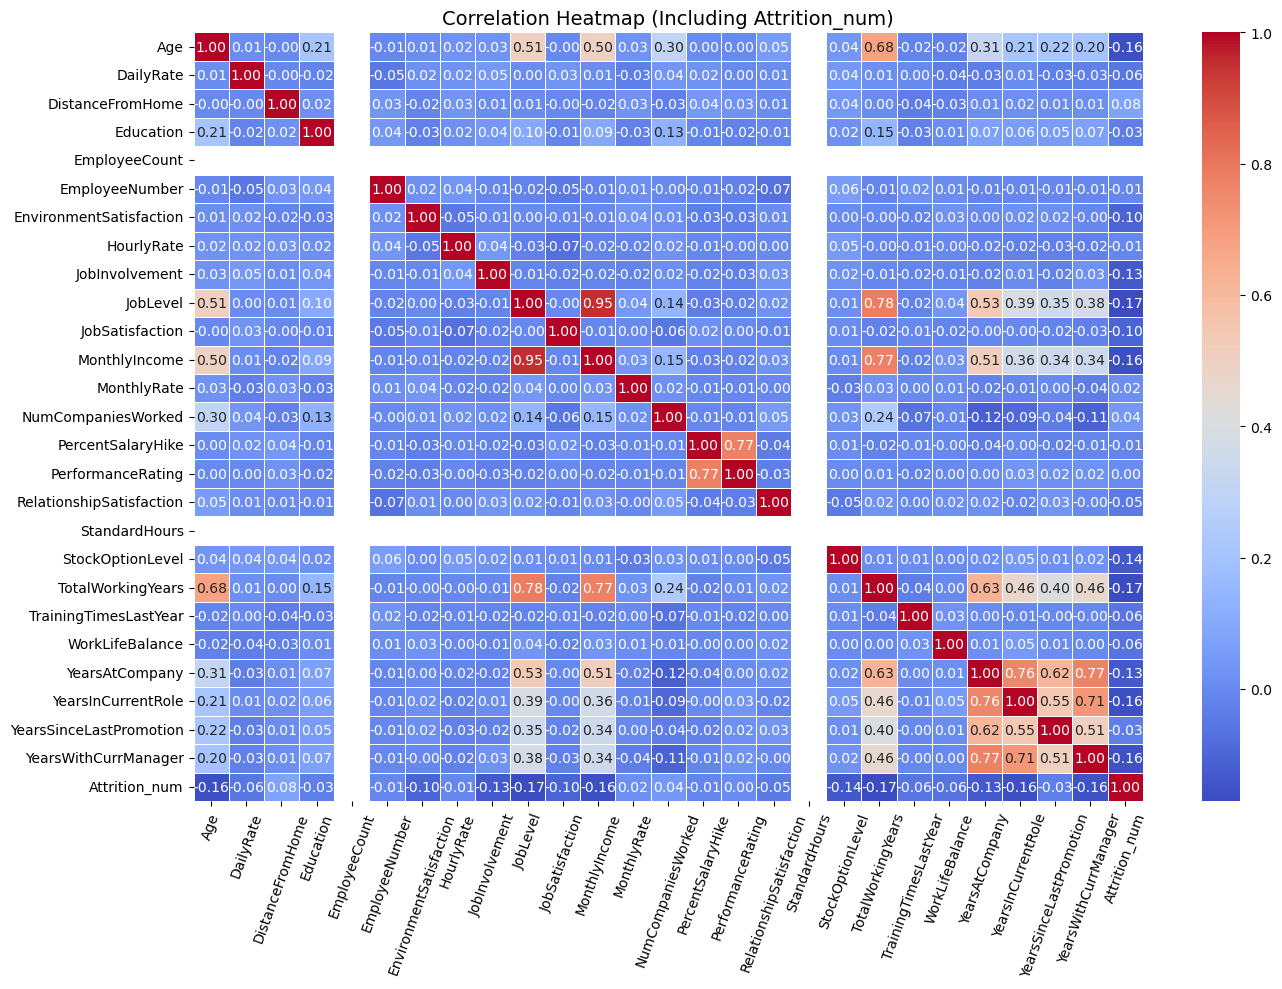

In [76]:
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1}) 

numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Including Attrition_num)", fontsize=14)
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
cat_cols = [
        'Attrition', 'BusinessTravel', 'Department', 'Education',
        'EducationField', 'EnvironmentSatisfaction', 'Gender',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus',  'OverTime', 'PerformanceRating',
        'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance','Over18'
    ]

In [80]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import math

def plot_only_pie_charts(df, categorical_cols):
    colors = ['#ffadad','#ffd6a5','#fdffb6','#caffbf','#9bf6ff','#a0c4ff','#bdb2ff','#ffc6ff','#809bce']

    num_charts = len(categorical_cols)
    cols_per_row = 3
    total_rows = math.ceil(num_charts / cols_per_row)

    fig = make_subplots(
        rows=total_rows,
        cols=cols_per_row,
        specs=[[{"type": "pie"} for _ in range(cols_per_row)] for _ in range(total_rows)],
        subplot_titles=[f"{col} Distribution" for col in categorical_cols]
    )

    for idx, col in enumerate(categorical_cols):
        row = idx // cols_per_row + 1
        col_pos = idx % cols_per_row + 1
        counts = df[col].value_counts()

        fig.add_trace(
            go.Pie(
                labels=counts.index,
                values=counts.values,
                hole=0.4,
                marker=dict(colors=colors),
                textinfo='percent+label'
            ),
            row=row,
            col=col_pos
        )

    fig.update_layout(
        title_text="Categorical Feature Distributions (Pie Charts)",
        showlegend=False,
        height=400 * total_rows,
        width=1100,
        paper_bgcolor='black',
        plot_bgcolor='black',
        font=dict(color="white"),
        margin=dict(t=50, b=30)
    )

    fig.show()

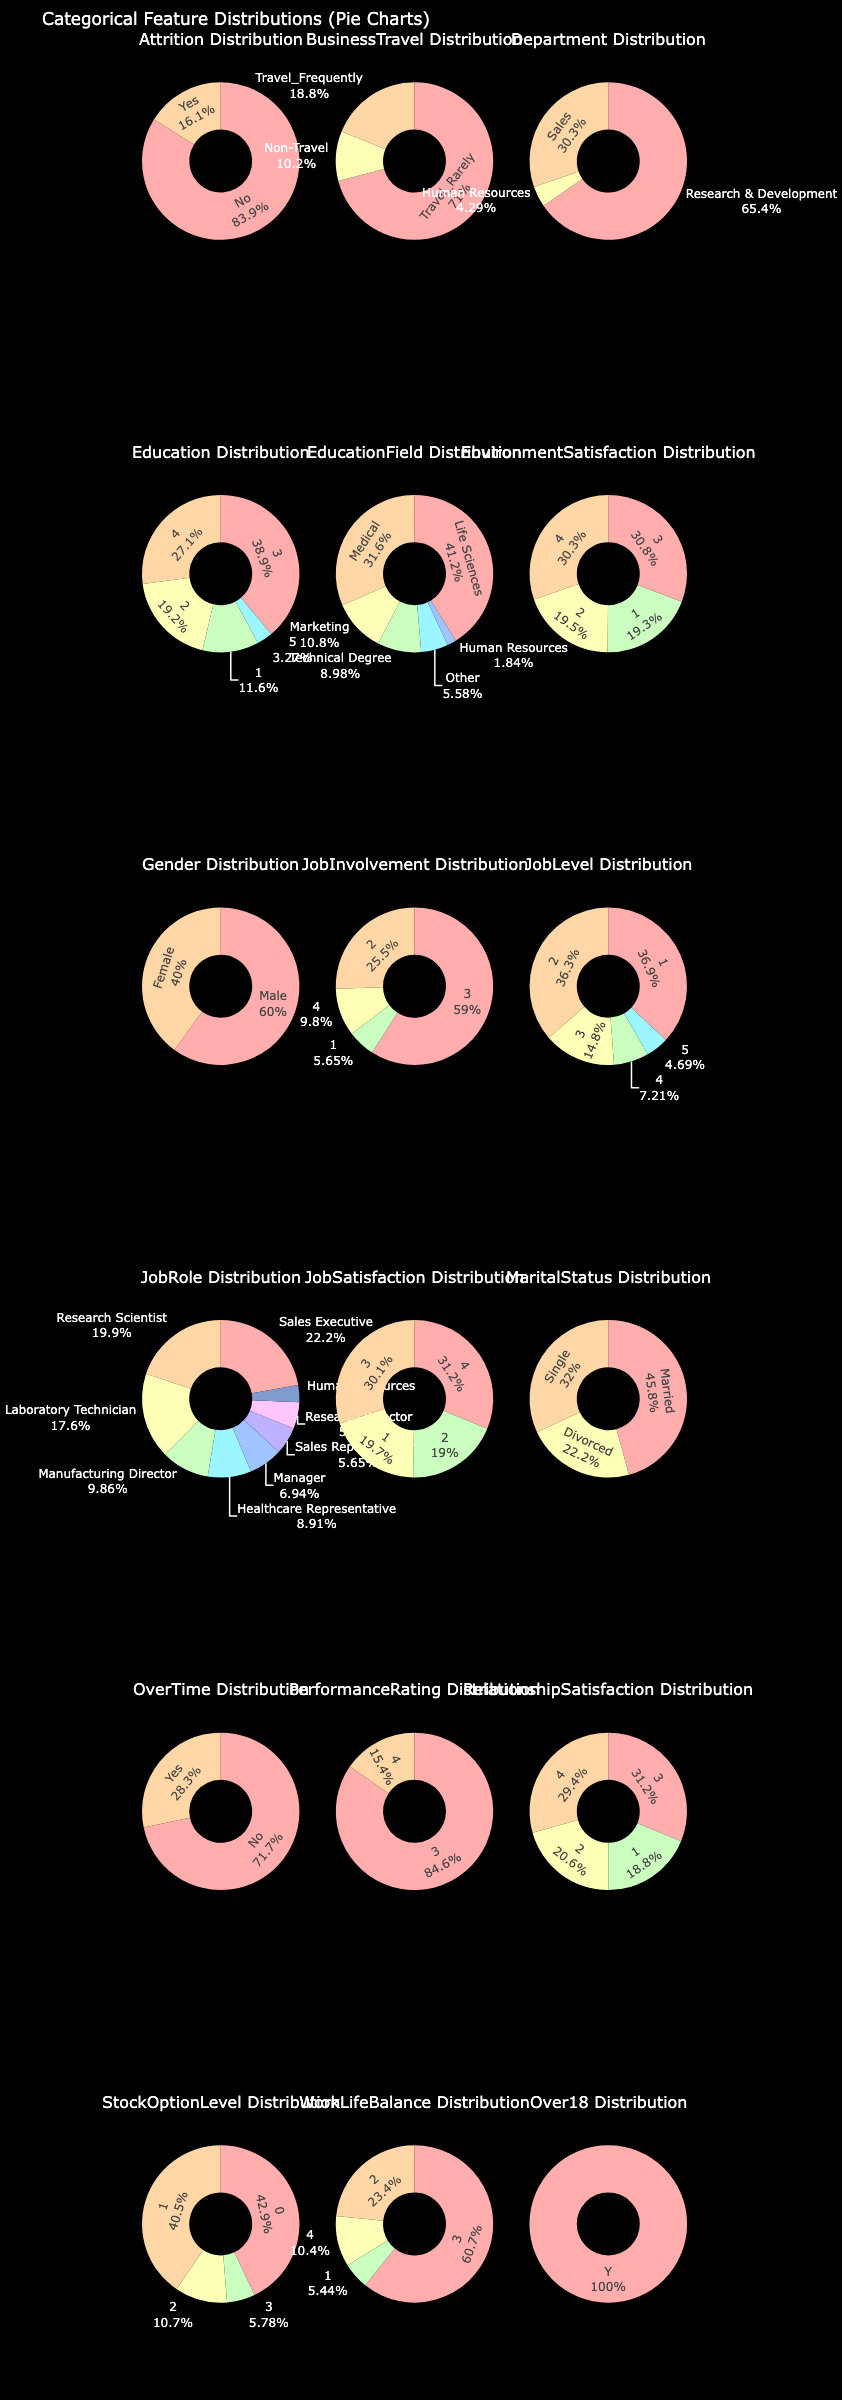

In [82]:
plot_only_pie_charts(df,cat_cols)

**Comment:**
- Most employees have not left their jobs.
- The majority do not travel.
- The research and development department makes up the majority of employees.
- More than half of the employees are male.
- Most employees are married.
- Most employees do not work overtime.
- All employees are over 18.

In [85]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import math

def plot_only_histograms(df, num_cols):
    cols_per_row = 2  # Her satırda 2 grafik
    total_rows = math.ceil(len(num_cols) / cols_per_row)

    fig = make_subplots(
        rows=total_rows,
        cols=cols_per_row,
        specs=[[{"type": "histogram"} for _ in range(cols_per_row)] for _ in range(total_rows)],
        subplot_titles=[f"{col} - Histogram" for col in num_cols]
    )

    for idx, col in enumerate(num_cols):
        row = idx // cols_per_row + 1
        col_pos = idx % cols_per_row + 1

        fig.add_trace(
            go.Histogram(
                x=df[col],
                name=f'{col} Histogram',
                marker=dict(color="#0A4D68", line=dict(color='#DBE6EC', width=0.5))
            ),
            row=row,
            col=col_pos
        )

    fig.update_layout(
        title_text="Numerical Feature Distributions (Histograms Only)",
        showlegend=False,
        height=320 * total_rows,
        width=900,
        paper_bgcolor='black',
        plot_bgcolor='black',
        font=dict(color="white"),
        margin=dict(t=50, b=30)
    )

    fig.show()

In [87]:
num_cols = [
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
        'EmployeeNumber', 'HourlyRate', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'
    ]

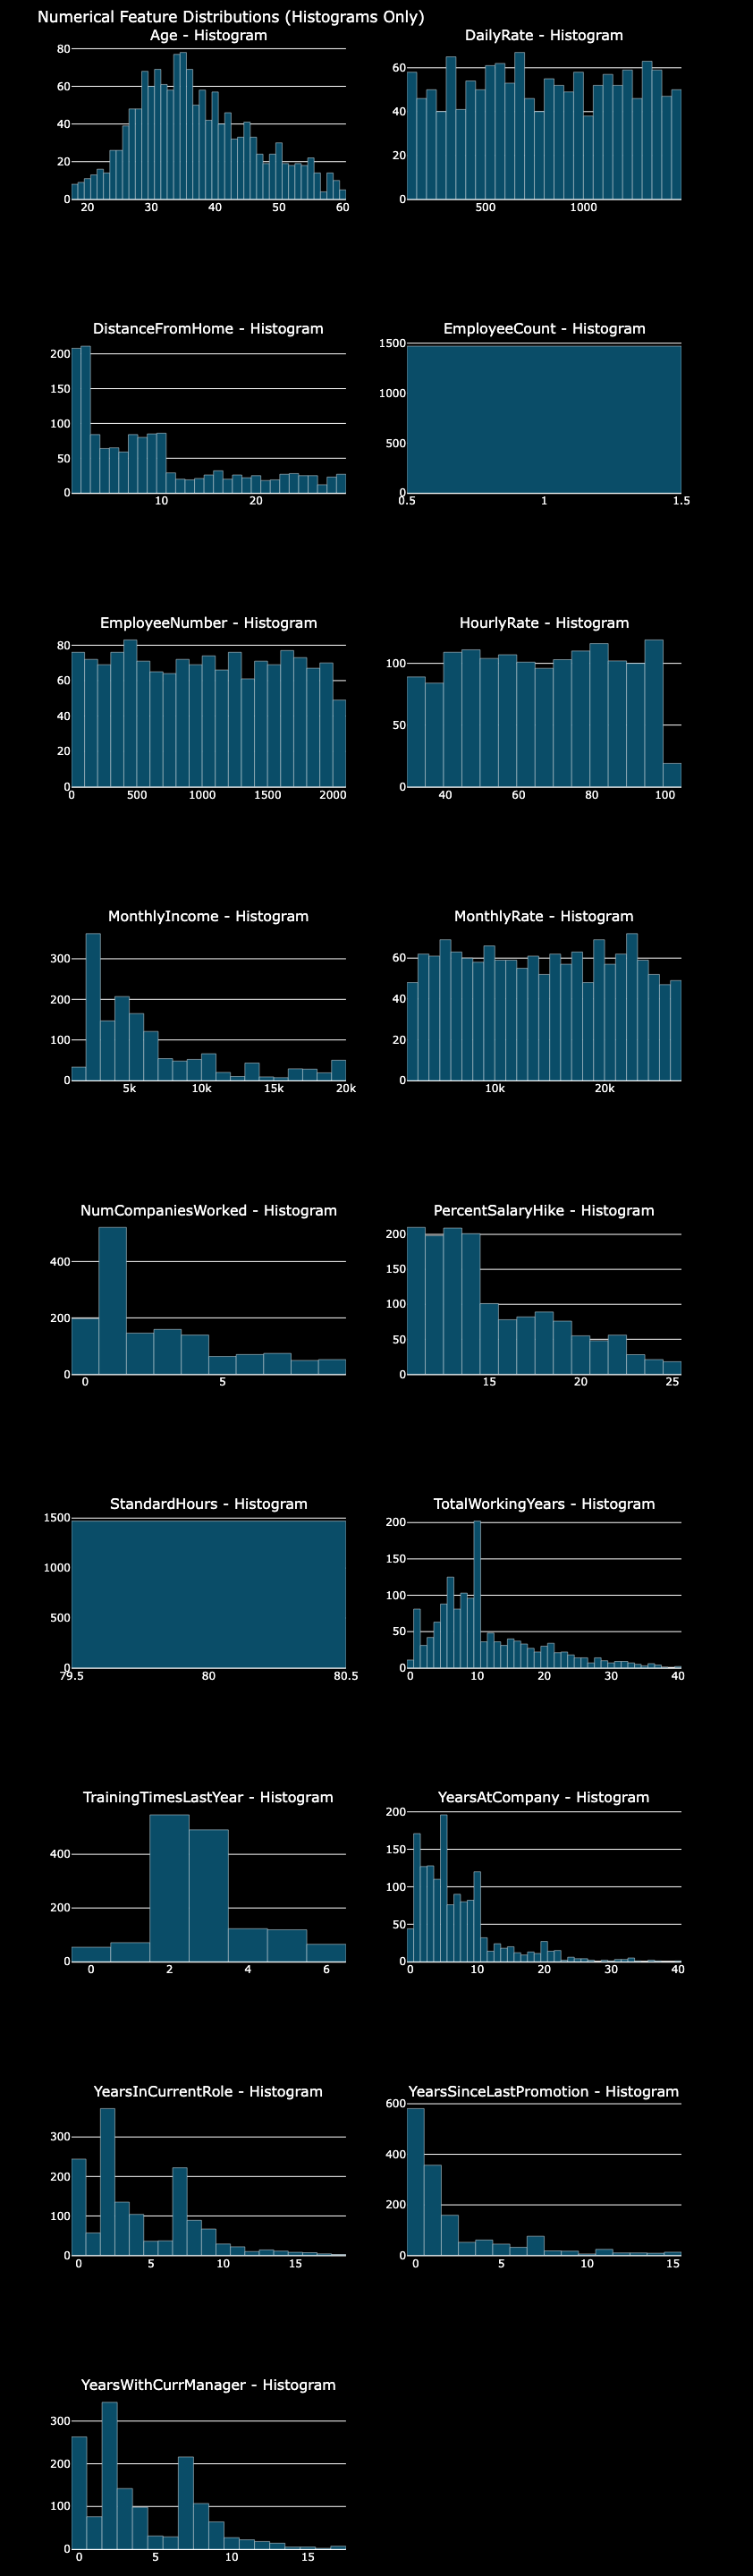

In [89]:
plot_only_histograms(df, num_cols)

**Comment:**
- Age distribution is balanced, with a concentration between the ages of 30 and 50.
- Almost everyone works the same hours.
- Tenure with the current manager is short.
- Tenure in the current position is generally short, with rapid rotation or a growing company.

In [92]:
# EmployeeCount, StandardHours and Over18 are the same for all rows. Also EmployeeNumber are distinguisher variable. 
# So, these columns won't help us in the analyze, we can drop these columns.

df = df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)

In [94]:
# The numeric version of Attrition was added as Attrition_num
df = df.drop(['Attrition'], axis=1) 

In [96]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_num'],
      dtype='object')

In [98]:
df.shape 

(1470, 31)

### Effect of Numerical Properties on Attrition Status

- We calculated correlations on numerical features to identify significant features that may affect the job leaving situation.

In [102]:
# Take only numeric variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation with Attrition_num
correlations = numeric_df.corr()['Attrition_num'].sort_values(ascending=False)
print(correlations)

Attrition_num               1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition_num, dtype: float64


- Converging to **+1** indicates that both features increase at the same rate.
- Converging to **0** indicates that there is no specific correlation between the two features.
- Converging to **-1** indicates that as one feature increases, the other decreases at the same rate.
- This correlation results in no relationship between PerformanceRating and Attribution.

In [105]:
df = df.drop(['PerformanceRating'], axis=1)

In [107]:
df.columns 

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_num'],
      dtype='object')

### Effect of Categorical Features on Attrition Status (Chi-Square Test)

In [110]:
from scipy.stats import chi2_contingency
# p-value < 0.05 → Significant relationship
def chi_square_test(df, col):
    table = pd.crosstab(df[col], df['Attrition_num']) 
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col} için p-değeri: {p:.5f}")
    if p < 0.05:
        print("(+) There is a statistically significant relationship.")
    else:
        print("(-) No meaningful relationship.")
    print("-" * 50)

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Attrition_num']

for col in categorical_cols:
    chi_square_test(df, col)

BusinessTravel için p-değeri: 0.00001
(+) There is a statistically significant relationship.
--------------------------------------------------
Department için p-değeri: 0.00453
(+) There is a statistically significant relationship.
--------------------------------------------------
EducationField için p-değeri: 0.00677
(+) There is a statistically significant relationship.
--------------------------------------------------
Gender için p-değeri: 0.29057
(-) No meaningful relationship.
--------------------------------------------------
JobRole için p-değeri: 0.00000
(+) There is a statistically significant relationship.
--------------------------------------------------
MaritalStatus için p-değeri: 0.00000
(+) There is a statistically significant relationship.
--------------------------------------------------
OverTime için p-değeri: 0.00000
(+) There is a statistically significant relationship.
--------------------------------------------------


### Finding Outliers for Some Numerical Properties (IQR (Interquartile Range)

In [113]:
columns_to_check = ['MonthlyIncome', 'DailyRate', 'Age', 'DistanceFromHome', 
                    'YearsAtCompany', 'YearsInCurrentRole', 'TotalWorkingYears']

In [115]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[[column]]


for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers found in column {col} with IQR: {len(outliers)}")

Number of outliers found in column MonthlyIncome with IQR: 114
Number of outliers found in column DailyRate with IQR: 0
Number of outliers found in column Age with IQR: 0
Number of outliers found in column DistanceFromHome with IQR: 0
Number of outliers found in column YearsAtCompany with IQR: 104
Number of outliers found in column YearsInCurrentRole with IQR: 21
Number of outliers found in column TotalWorkingYears with IQR: 63


- **MonthlyIncome** There are significant outliers in monthly income. This indicates that some employees' salaries are much higher or much lower than the majority.
- **YearsAtCompany** There are employees who have been with the company for a very long time or for a very short time. These employees deviate from the typical length of time.
- **TotalWorkingYears** In terms of total work experience, some employees are significantly out of step with the general trend.

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_outliers(df, cols):
    num_cols = len(cols)
    rows = (num_cols + 1) // 2

    plt.figure(figsize=(14, 5 * rows))
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, 2, i)
        sns.boxplot(data=df, y=col, color="#00b4d8", fliersize=4)
        plt.title(f"{col} - Boxplot", fontsize=12)
        plt.ylabel("")
        plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

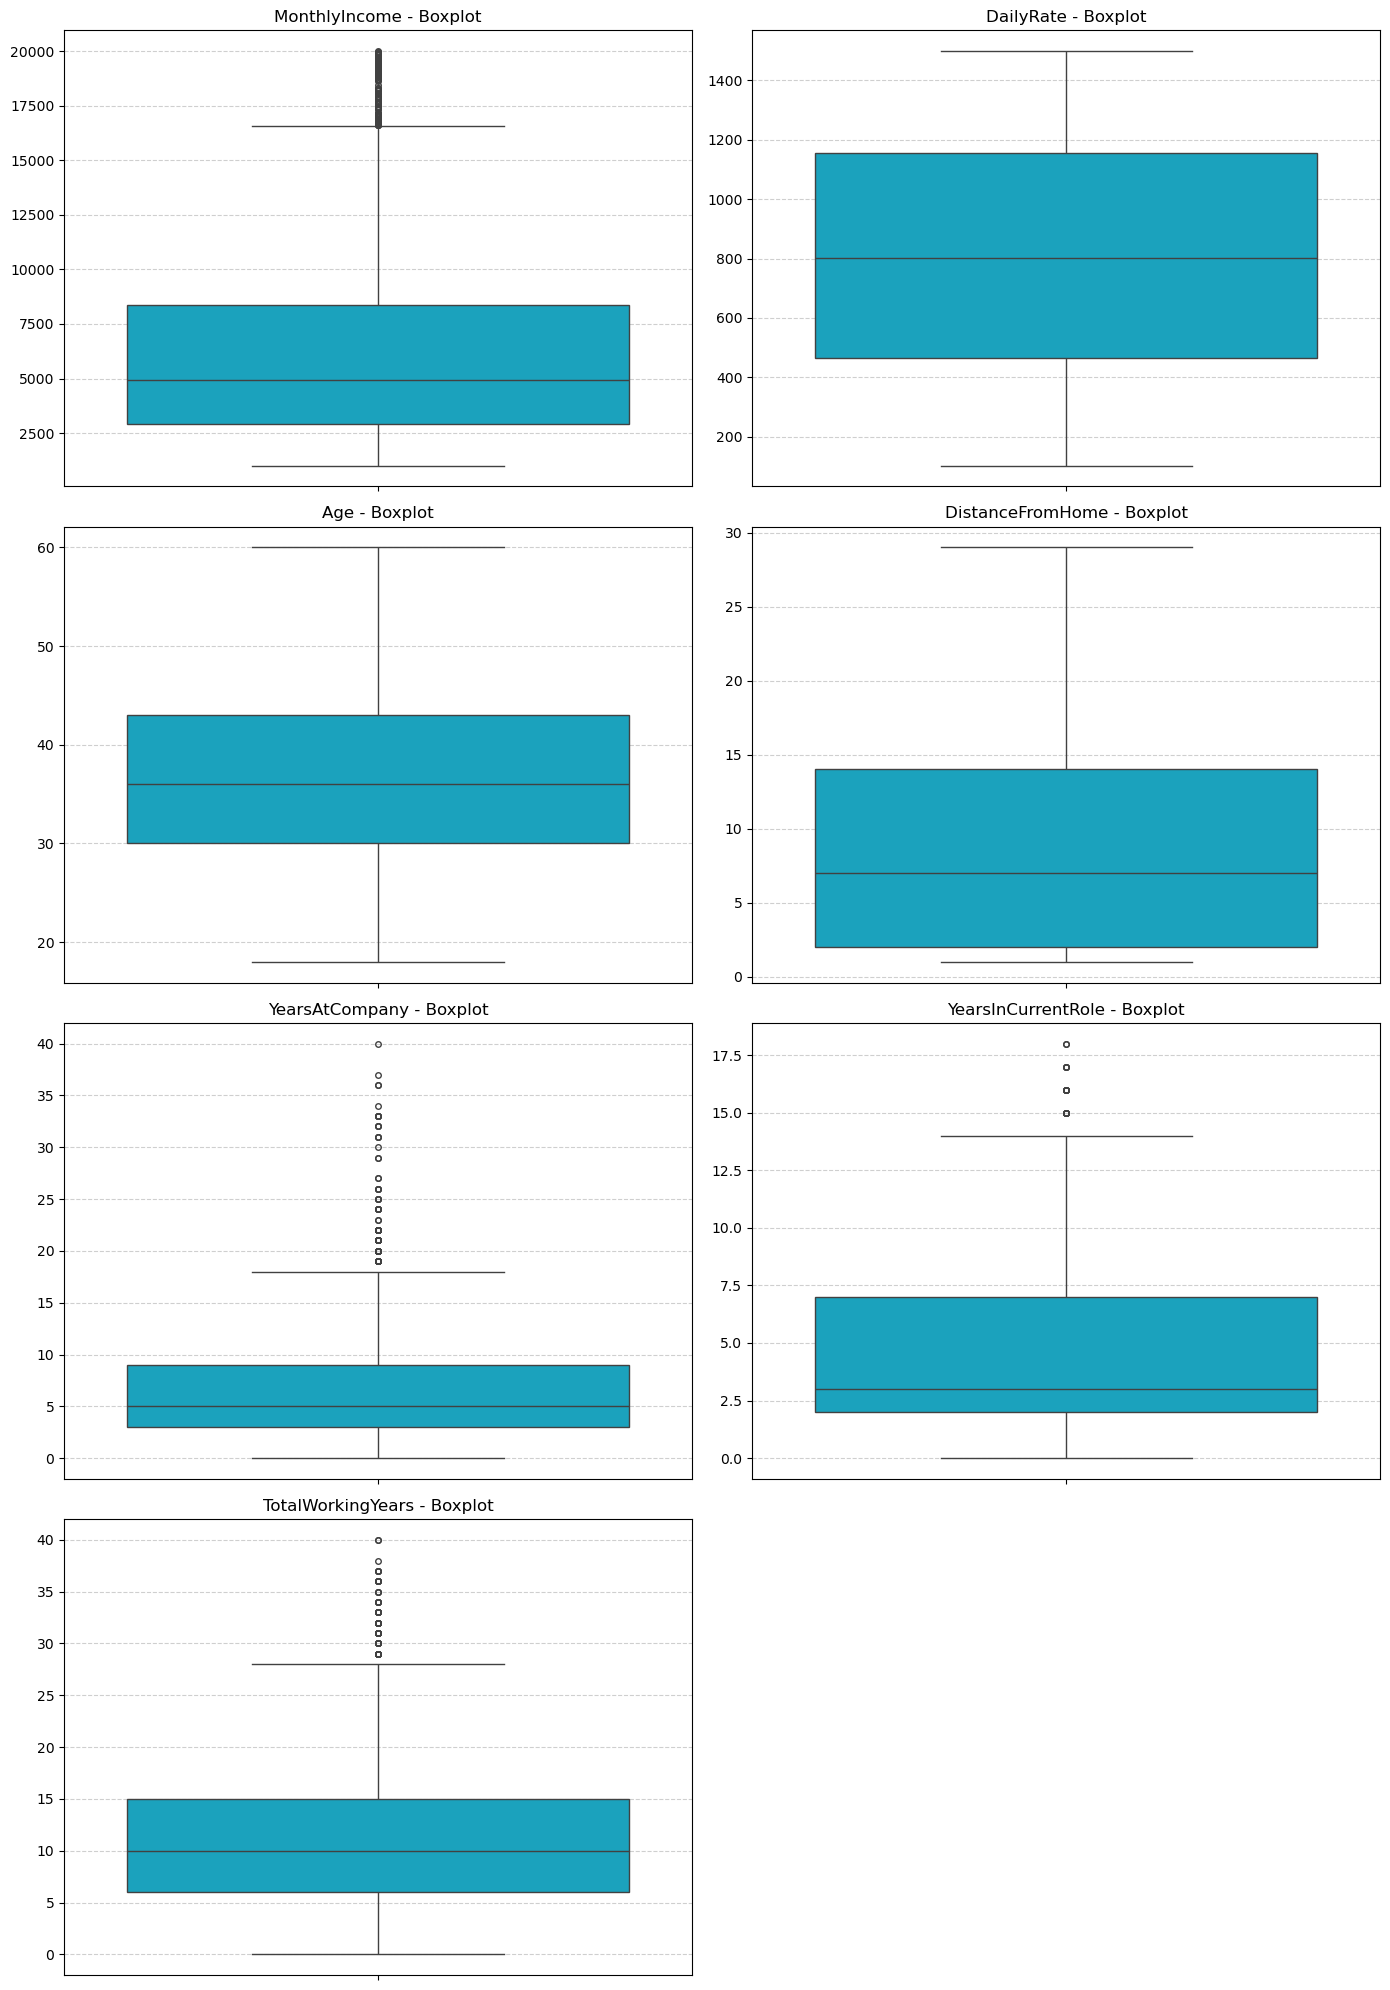

In [120]:
visualize_outliers(df, columns_to_check)

### Finding Outliers for Some Numerical Properties (Z-Score)

In [123]:
from scipy.stats import zscore

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = df[abs(z_scores) > threshold]
    return outliers[[column]]

In [125]:
for col in columns_to_check:
    outliers = detect_outliers_zscore(df, col)
    print(f"Number of outliers found with ZScore in column {col}: {len(outliers)}")

Number of outliers found with ZScore in column MonthlyIncome: 0
Number of outliers found with ZScore in column DailyRate: 0
Number of outliers found with ZScore in column Age: 0
Number of outliers found with ZScore in column DistanceFromHome: 0
Number of outliers found with ZScore in column YearsAtCompany: 25
Number of outliers found with ZScore in column YearsInCurrentRole: 13
Number of outliers found with ZScore in column TotalWorkingYears: 16


In [127]:
def visualize_outliers_hist(df, cols):
    num_cols = len(cols)
    rows = (num_cols + 1) // 2

    plt.figure(figsize=(14, 5 * rows))
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, 2, i)
        sns.histplot(data=df, x=col, bins=50, kde=True)
        
        plt.title(f"{col} - Histogram", fontsize=12)
        plt.ylabel("")
        plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

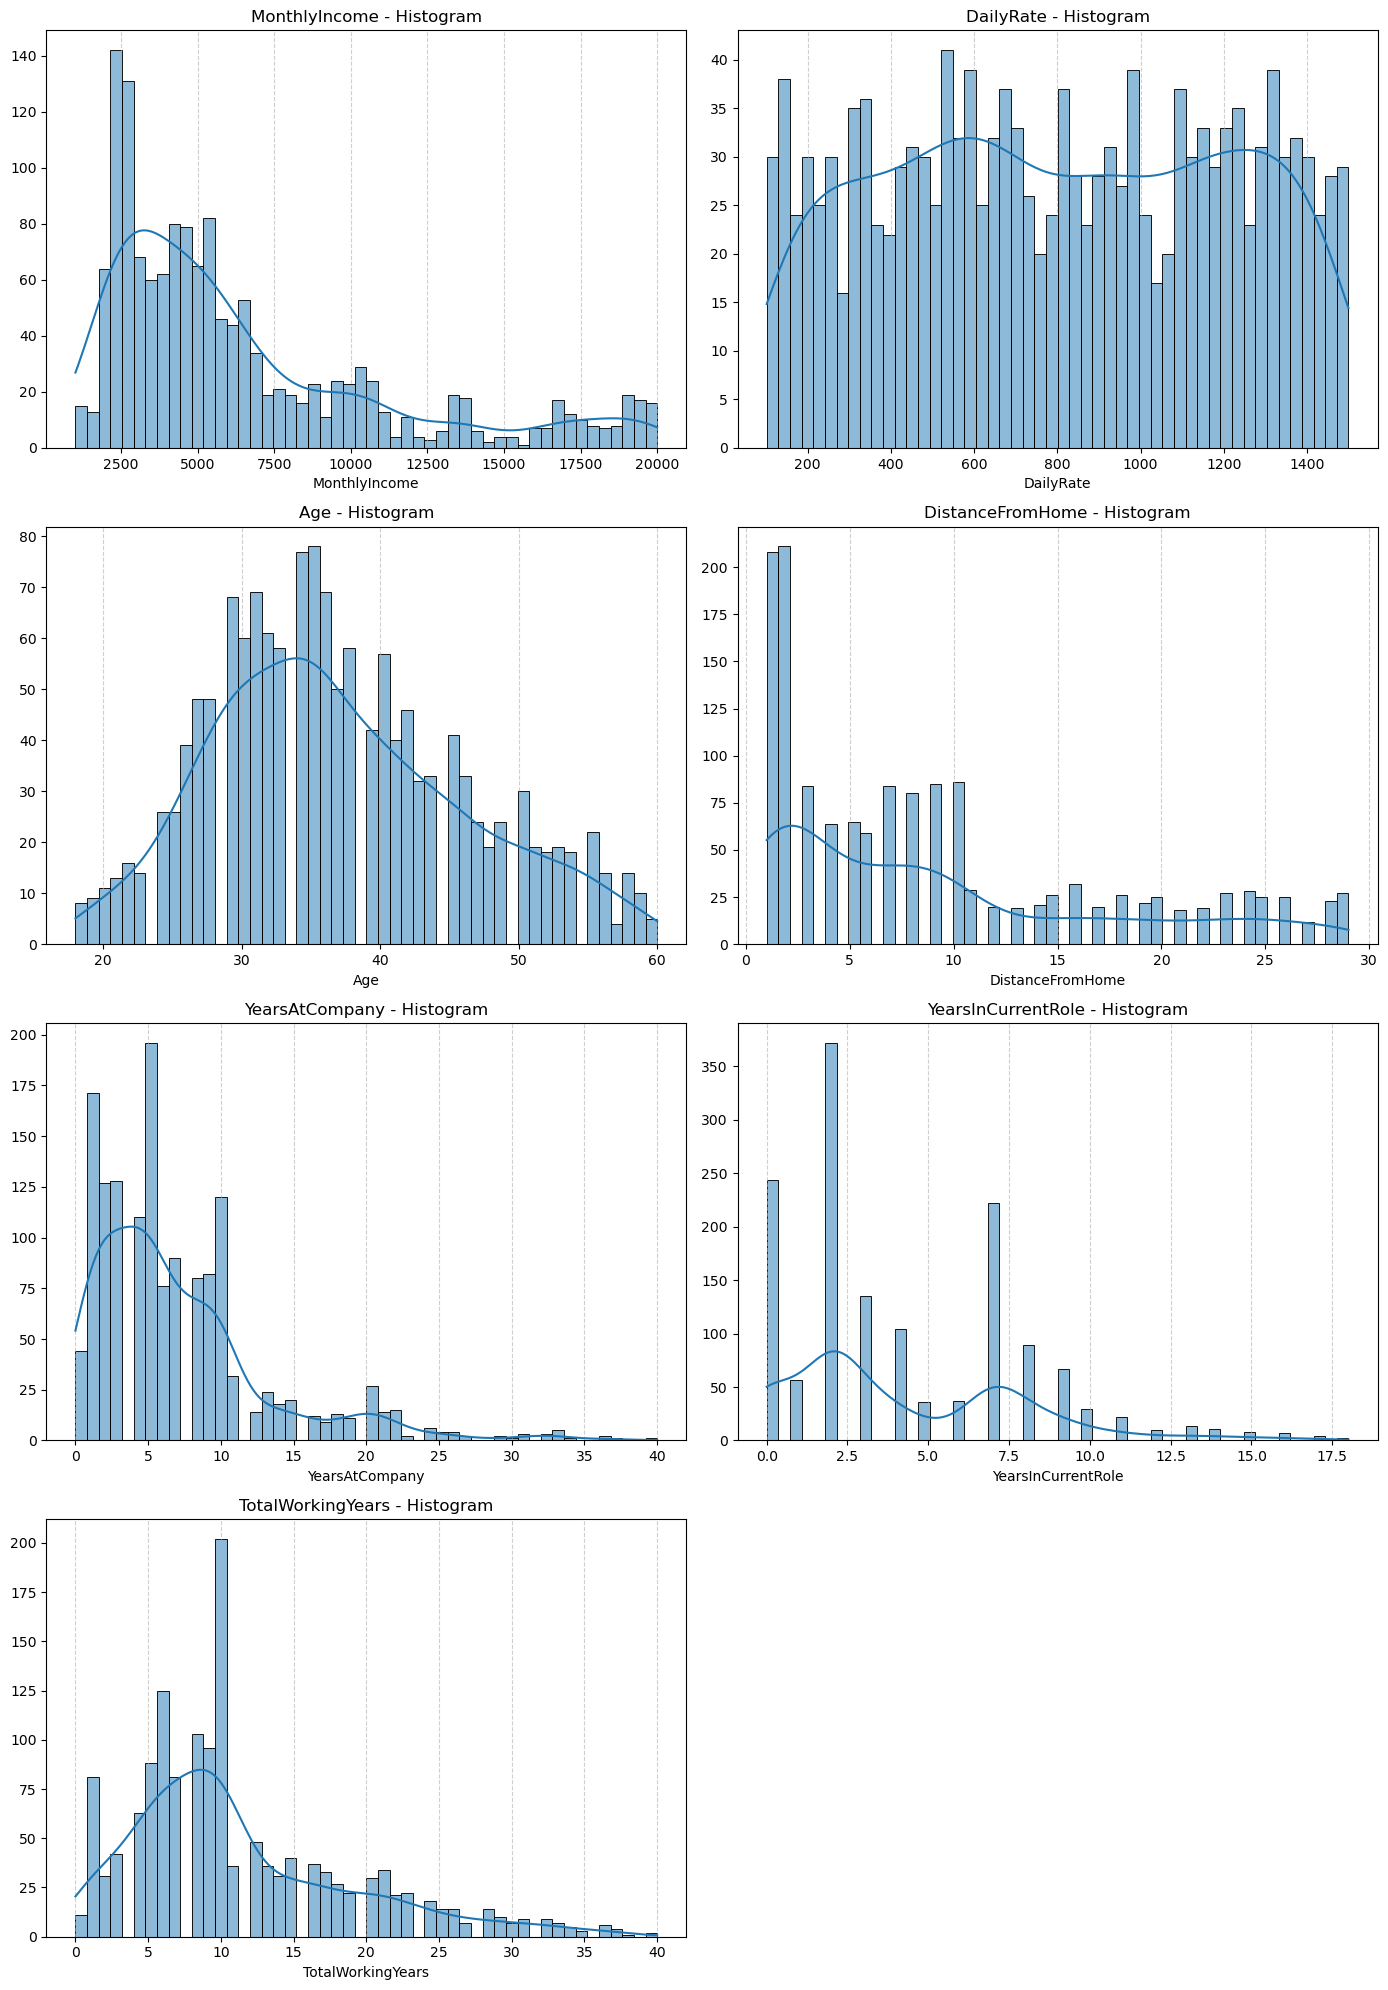

In [129]:
visualize_outliers_hist(df, columns_to_check)

- According to the IQR method, values ​​falling outside the "lower_bound" and "upper_bound" ranges are designated as outliers. (Wider range)
- In the ZScore method, values ​​with absolute Z values ​​greater than 3 (abs(z_scores) > threshold) are designated as outliers. It only captures truly extreme values.
- The IQR method examines the interquartile range for Q1 and Q3. Those falling outside the range are designated as outliers.
- The ZScore method measures how far the data is from the standard deviation.
- The IQR method is more reliable because it is a robust method. It makes no assumptions about the distribution of the data.
- MonthlyIncome: There were 114 outliers in the IQR, while there were 0 in the Z-Score. The salary distribution may be close to a normal distribution, but there are extreme values ​​in the interquartile range.
- There are outliers in the experience variables in both methods, a consistent finding.

## WHAT TO DO WITH OUTLIERS?
Instead of completely removing rows containing outliers from the data:
- Winsorizing, outliers are replaced with specified lower and upper bound values.
- Transformation, logarithmic or radical transformations are performed to reduce the impact of outliers.

### WINSORIZING EXTREME VALUES

In [134]:
from scipy.stats.mstats import winsorize

for col in columns_to_check:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

In [136]:
for col in columns_to_check:
    outliers = detect_outliers_zscore(df, col)
    print(f"Number of outliers found with ZScore in column {col}: {len(outliers)}")

Number of outliers found with ZScore in column MonthlyIncome: 0
Number of outliers found with ZScore in column DailyRate: 0
Number of outliers found with ZScore in column Age: 0
Number of outliers found with ZScore in column DistanceFromHome: 0
Number of outliers found with ZScore in column YearsAtCompany: 0
Number of outliers found with ZScore in column YearsInCurrentRole: 0
Number of outliers found with ZScore in column TotalWorkingYears: 0


In [138]:
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers found in column {col} with IQR: {len(outliers)}")

Number of outliers found in column MonthlyIncome with IQR: 114
Number of outliers found in column DailyRate with IQR: 0
Number of outliers found in column Age with IQR: 0
Number of outliers found in column DistanceFromHome with IQR: 0
Number of outliers found in column YearsAtCompany with IQR: 104
Number of outliers found in column YearsInCurrentRole with IQR: 0
Number of outliers found in column TotalWorkingYears with IQR: 0


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: Use

- According to our analysis using ZScore after winsorizing, outliers were successfully delimited.
- However, the IQR method is more stringent than ZScore.

### TRANSFORMATION PROCESS TO EXTREME VALUES (LOG)

In [142]:
import numpy as np

for col in columns_to_check:
    df[col] = np.log1p(df[col])

In [144]:
for col in columns_to_check:
    outliers = detect_outliers_zscore(df, col)
    print(f"Number of outliers found with ZScore in column {col}: {len(outliers)}")

Number of outliers found with ZScore in column MonthlyIncome: 0
Number of outliers found with ZScore in column DailyRate: 0
Number of outliers found with ZScore in column Age: 0
Number of outliers found with ZScore in column DistanceFromHome: 0
Number of outliers found with ZScore in column YearsAtCompany: 0
Number of outliers found with ZScore in column YearsInCurrentRole: 0
Number of outliers found with ZScore in column TotalWorkingYears: 0


In [146]:
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers found in column {col} with IQR: {len(outliers)}")

Number of outliers found in column MonthlyIncome with IQR: 0
Number of outliers found in column DailyRate with IQR: 0
Number of outliers found in column Age with IQR: 0
Number of outliers found in column DistanceFromHome with IQR: 0
Number of outliers found in column YearsAtCompany with IQR: 0
Number of outliers found in column YearsInCurrentRole with IQR: 0
Number of outliers found in column TotalWorkingYears with IQR: 92


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning:


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: Use

We can see that the operations we performed on the extreme values ​​cancel out the extreme values ​​found with the ZScore method, but they fail to completely cancel out the extreme values ​​found with the IQR method. This suggests that the data is asymmetry. Unlike the ZScore method, the IQR method is formula-based, not data-based. Therefore, it is more stringent. While the log transformation doesn't eliminate extreme values, it is useful when training the model because it brings the data closer to a normal distribution and reduces variance.

### SCALING WITH STANDARD SCALER

In [150]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [152]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_std = df.copy()
df_std[num_cols] = std_scaler.fit_transform(df_std[num_cols])

In [154]:
print(df_std[num_cols].describe().T[['mean', 'std']])

                                  mean      std
Age                      -1.776357e-15  1.00034
DailyRate                -1.570928e-16  1.00034
DistanceFromHome          8.458842e-17  1.00034
Education                 7.008755e-17  1.00034
EnvironmentSatisfaction   1.305078e-16  1.00034
HourlyRate                1.691768e-16  1.00034
JobInvolvement            6.525392e-17  1.00034
JobLevel                 -2.658493e-17  1.00034
JobSatisfaction          -9.183886e-17  1.00034
MonthlyIncome             2.537653e-16  1.00034
MonthlyRate               3.021015e-17  1.00034
NumCompaniesWorked        1.450087e-17  1.00034
PercentSalaryHike         2.271803e-16  1.00034
RelationshipSatisfaction  9.667248e-17  1.00034
StockOptionLevel          6.767074e-17  1.00034
TotalWorkingYears        -5.558668e-17  1.00034
TrainingTimesLastYear     8.700523e-17  1.00034
WorkLifeBalance          -6.042030e-18  1.00034
YearsAtCompany           -8.458842e-17  1.00034
YearsInCurrentRole        2.223467e-16  

### SCALING WITH MinMaxScaler

In [157]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

In [159]:
print(df_minmax[num_cols].describe().T[['mean', 'std']])

                              mean       std
Age                       0.496890  0.285662
DailyRate                 0.656804  0.292959
DistanceFromHome          0.493737  0.326903
Education                 0.478231  0.256041
EnvironmentSatisfaction   0.573923  0.364361
HourlyRate                0.512731  0.290420
JobInvolvement            0.576644  0.237187
JobLevel                  0.265986  0.276735
JobSatisfaction           0.576190  0.367615
MonthlyIncome             0.425106  0.299217
MonthlyRate               0.490629  0.285797
NumCompaniesWorked        0.299244  0.277557
PercentSalaryHike         0.300680  0.261424
RelationshipSatisfaction  0.570748  0.360403
StockOptionLevel          0.264626  0.284026
TotalWorkingYears         0.598360  0.251799
TrainingTimesLastYear     0.466553  0.214878
WorkLifeBalance           0.587075  0.235492
YearsAtCompany            0.480255  0.295684
YearsInCurrentRole        0.551370  0.314055
YearsSinceLastPromotion   0.145850  0.214829
YearsWithC

### SCALING WITH RobustScaler

In [162]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])

In [164]:
print(df_robust[num_cols].describe().T[['mean', 'std']])

                              mean       std
Age                      -0.000759  0.643149
DailyRate                -0.182245  0.694106
DistanceFromHome         -0.062910  0.528648
Education                -0.043537  0.512082
EnvironmentSatisfaction  -0.139116  0.546541
HourlyRate               -0.003045  0.568655
JobInvolvement           -0.270068  0.711561
JobLevel                  0.031973  0.553470
JobSatisfaction          -0.135714  0.551423
MonthlyIncome             0.054877  0.606189
MonthlyRate               0.006251  0.573345
NumCompaniesWorked        0.231066  0.832670
PercentSalaryHike         0.201587  0.609990
RelationshipSatisfaction -0.143878  0.540604
StockOptionLevel         -0.206122  0.852077
TotalWorkingYears        -0.126585  0.814522
TrainingTimesLastYear    -0.200680  1.289271
WorkLifeBalance          -0.238776  0.706476
YearsAtCompany            0.033448  0.758780
YearsInCurrentRole       -0.016509  0.795652
YearsSinceLastPromotion   0.395918  1.074143
YearsWithC

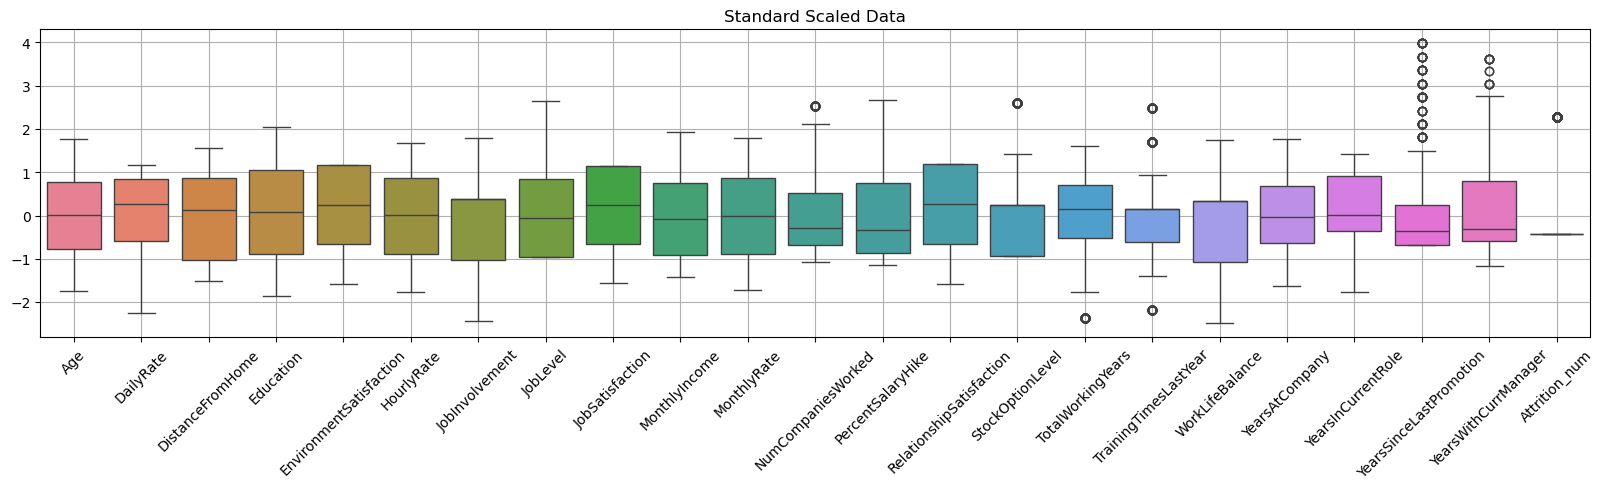

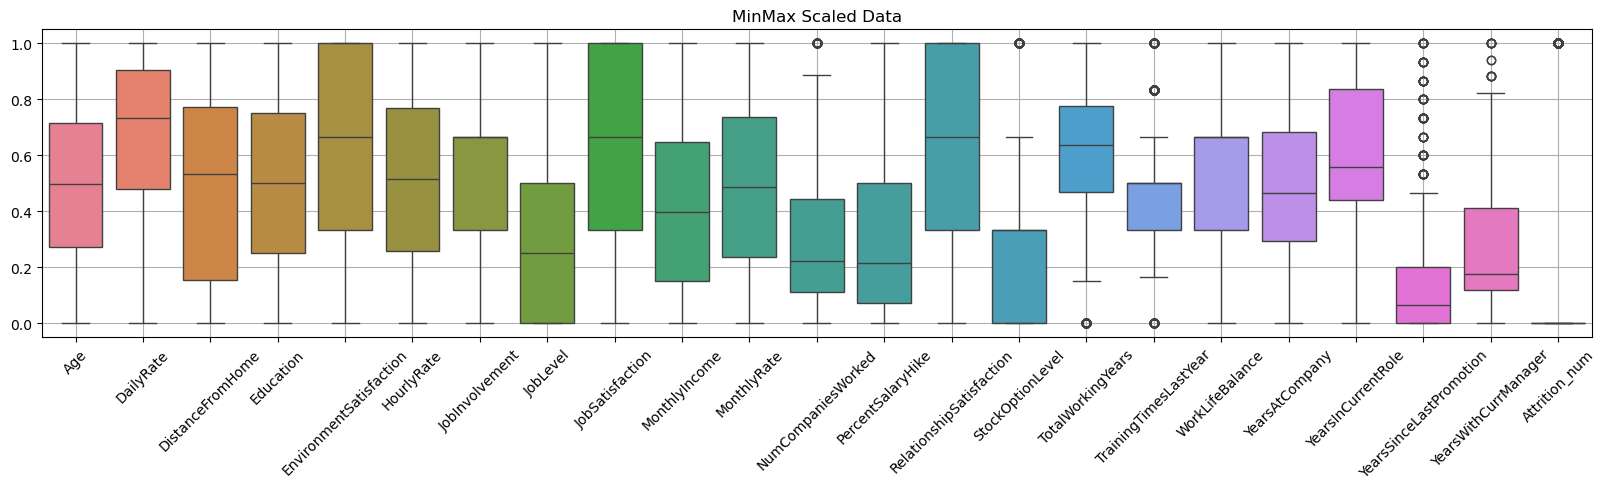

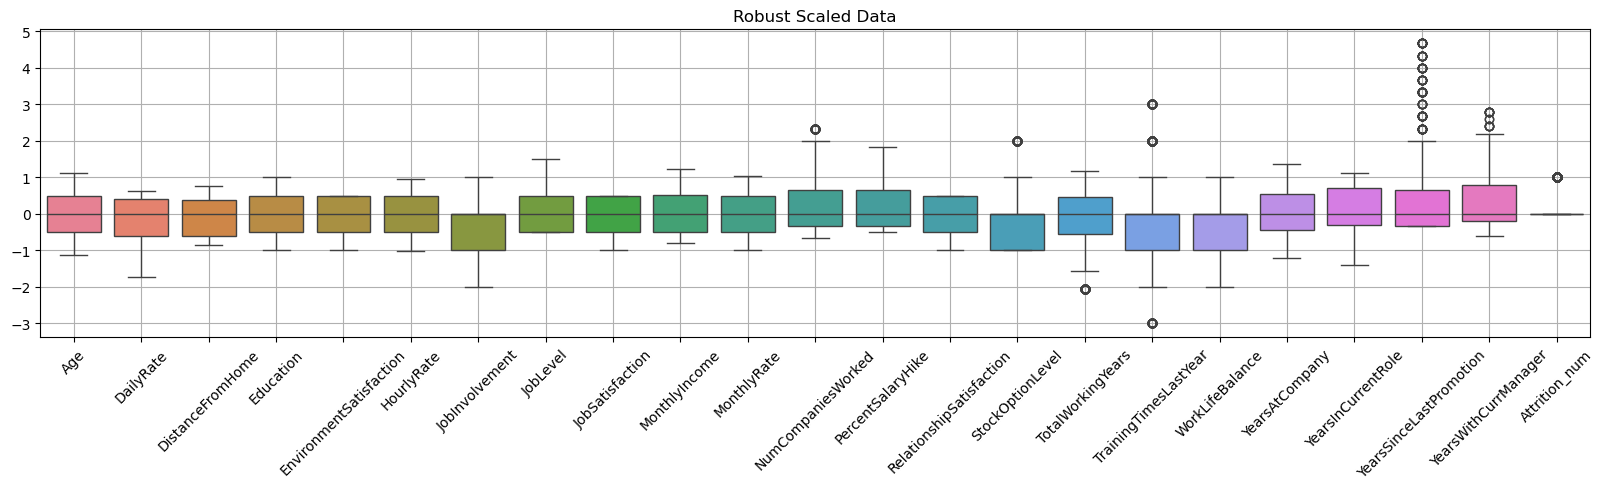

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

for scaler_name, df_scaled in {
    "Standard": df_std,
    "MinMax": df_minmax,
    "Robust": df_robust,
}.items():
    plt.figure(figsize=(20, 4))
    sns.boxplot(data=df_scaled[num_cols])
    plt.title(f"{scaler_name} Scaled Data")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

- StandardScaler: Scales the data so that the mean is 0 and the standard deviation is 1.
- MinMaxScaler: Compresses the data to the range [0, 1].
- RobustScaler: Works with median and IQR. It is robust to outliers. It is used when there are outliers and the data does not need to be cleaned.

RobustScaler is the best option;
- Most resistant to outliers.
- There are outliers in the graph, but the main distribution is very uniform.
- If there are many outliers in the data, Robust Scaling handles them best.
- MinMaxScaler has brought the data to the range of 0-1, but outliers are still visible. The distributions are very tight.

### ENCODING

In [170]:
# Find the categoric columns to encode
categoric_cols = df.select_dtypes(include = 'object').columns

In [172]:
print(categoric_cols)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


Losing any column after the encoding of the Target variable may adversely affect the model, so we store the Attrition column separately.

In [175]:
y = df['Attrition_num'] # hedef (target)

In [177]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_num, Length: 1470, dtype: int64


In [179]:
df_encoded = pd.get_dummies(df, columns=categoric_cols, drop_first=True)

- categoric_cols: Categorical data is passed as a parameter.
- drop_first=True: automatically deletes the first category of each categorical column. Because those columns are references, their values ​​are already 0. It does not affect the model.
- n-1 columns are created for each category.
- The risk of multicollinearity is reduced.

In [182]:
print(df_encoded.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_num',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',

In [184]:
X = df_encoded.drop('Attrition_num', axis=1)

In [186]:
print(X.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales E

In [188]:
print(X.columns.shape)

(43,)


If we scale first and then encode, the encoded columns will not undergo the scaling stage. This creates a scale difference. Therefore, we will use the RobustScaler, the one that best suppresses outliers among the three scalers we developed above, to scale the encoded dataset.

However, before scaling, we should split the train and test data.

This prevents overfitting. The model's true performance is visible.
- X_train : fit_transform
- X_test : transform
- If we apply fit_transform to the test data, the model accesses the statistics of the test data (data leakage).
- This overestimates the model's true performance.
- y, target. Since its purpose is labeling, it is not scaled.

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [193]:
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [195]:
print(X_train_scaled)

[[ 0.74323613  0.47134733 -0.60942348 ...  0.          0.
   0.        ]
 [-1.11947278 -0.32804043 -0.60942348 ...  1.          0.
   0.        ]
 [ 0.6831183  -0.74793915 -0.43067656 ...  1.          0.
   0.        ]
 ...
 [-1.11947278 -1.43826598  0.07318271 ...  1.          0.
   0.        ]
 [ 0.         -0.6845865  -0.60942348 ...  1.          0.
   1.        ]
 [ 0.22261851 -0.04726769  0.59963848 ...  0.          0.
   0.        ]]


In [197]:
print(X_test_scaled)

[[-1.11947278  0.04134877  0.34770884 ...  1.          0.
   0.        ]
 [ 0.55894694  0.369382   -0.60942348 ...  1.          0.
   0.        ]
 [-0.41456597 -0.16585221  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.63844125  0.34770884 ...  0.          0.
   1.        ]
 [ 1.13196037  0.49807859 -0.86135312 ...  1.          0.
   0.        ]
 [ 0.07615095  0.59656154 -0.86135312 ...  0.          1.
   0.        ]]


In [199]:
print(y_train)

1194    0
128     0
810     0
478     0
491     0
       ..
1213    1
963     0
734     0
1315    0
1292    0
Name: Attrition_num, Length: 1176, dtype: int64


In [201]:
print(y_test)

1061    0
891     0
456     0
922     0
69      1
       ..
1269    0
1352    0
1236    1
1023    0
285     0
Name: Attrition_num, Length: 294, dtype: int64


### **1) LOGISTIC REGRESSION**

Logistic regression is a statistical machine learning algorithm widely used for two-class (binary) classification problems. It estimates the probability of an event occurring based on input features (X). The model output is a probability between 0 and 1. If the probability is greater than 0.5, the class is generally considered "1"; if less, the class is considered "0."

**LOGISTIC REGRESSION Parameters**
- **penalty :** Regularization type: 'l1', 'l2', 'elasticnet', or 'none', Default: 'l2'
- **C :** Regularization coefficient (1/λ). A lower C indicates stronger regularization.
- **solver :** Optimization algorithm: 'liblinear', 'lbfgs', 'saga', 'newton-cg', 'sag', E.g.: 'liblinear' (small dataset, L1 supported), 'saga' (large data for L1/L2/ElasticNet)
- **max_iter :** Maximum number of iterations. The model trains for this number of iterations.
- **class_weight :** Weighting for unbalanced classes. Can be either None or 'balanced'.
- **random_state=42 :** Used to control randomness.

### LR Training with Default Parameters

In [206]:
from sklearn.linear_model import LogisticRegression

default_LR = LogisticRegression()

default_LR.fit(X_train_scaled, y_train)

y_pred_def = default_LR.predict(X_test_scaled)
print('Logistic Regression Model Accuracy : ', default_LR.score(X_test_scaled, y_test)*100, '%')

Logistic Regression Model Accuracy :  87.75510204081633 %


### **Grid Search Cross Validation**
- It tests all combinations of the specified parameters. When evaluating each combination, it splits the data into training/test subsets (e.g., 5-fold CV), thus increasing the reliability of the results.
- We determine the best-performing models by training models with different parameter combinations.

In [209]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear'],
    'max_iter': [500, 1000],
    'class_weight': [None, 'balanced']
}


LR = LogisticRegression()

grid_search = GridSearchCV(estimator = LR, param_grid = param_grid, 
                          cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [500, 1000], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [210]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=500, solver='liblinear')

In [213]:
lr = LogisticRegression(C=1,max_iter=500,solver='liblinear')

lr.fit(X_train_scaled, y_train)

y_pred_tuned = lr.predict(X_test_scaled)
print('Logistic Regression Model Accuracy : ', lr.score(X_test_scaled, y_test)*100, '%')

Logistic Regression Model Accuracy :  88.09523809523809 %


In [215]:
# Default model evaluation
acc_default = accuracy_score(y_test, y_pred_def)
prec_default = precision_score(y_test, y_pred_def)
rec_default = recall_score(y_test, y_pred_def)
f1_default = f1_score(y_test, y_pred_def)

# Tuned model evaluation
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned)
rec_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

evaluation_df = pd.DataFrame({
    'Accuracy': [acc_default, acc_tuned],
    'Precision': [prec_default, prec_tuned],
    'Recall': [rec_default, rec_tuned],
    'F1 Score': [f1_default, f1_tuned]
}, index=['LR Default', 'LR & Hyperparameter Tuning'])

print(evaluation_df)


                            Accuracy  Precision    Recall  F1 Score
LR Default                  0.877551   0.720000  0.382979  0.500000
LR & Hyperparameter Tuning  0.880952   0.730769  0.404255  0.520548


**Disclosure:** Hyperparameter optimization yielded small but positive improvements in the model's overall accuracy (0.35%), precision (1%), and recall (2%). The increase in F1 score, in particular, indicates that the model is beginning to recognize positive classes more evenly. These improvements demonstrate that steps are being taken in the right direction to improve the model's classification performance.

### McNemar Test for Model Predictions

- The McNemar test tests whether the predictions of two models on the same dataset are different. It is particularly suitable for comparing the performance of two models in classification problems.

In [220]:
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

correct_default = (y_pred_def == y_test)
correct_tuned = (y_pred_tuned == y_test)

b = np.sum((correct_default == False) & (correct_tuned == True))   # default is false, tuned is true
c = np.sum((correct_default == True) & (correct_tuned == False))   # default is true, tuned is false

table = [[0, b], [c, 0]]

# We run the McNemar test
result = mcnemar(table, exact=True)

print(f"McNemar Test p-değeri: {result.pvalue:.5f}")
if result.pvalue < 0.05:
    print("Conclusion: The difference in performance of the two models is statistically significant.")
else:
    print("Conclusion: The difference in performance of the two models is not statistically significant.")

McNemar Test p-değeri: 1.00000
Conclusion: The difference in performance of the two models is not statistically significant.


**Comment**
- The McNemar test result (p=1.000) indicates that there is no statistically significant difference between the default and hyperparameter-adjusted Logistic Regression models, indicating that the two models make largely similar predictions.

### **2) KNN**

- The class of a new data point is determined by examining the k (nearest) neighboring data points. The new data point is assigned to the class to which the majority of these neighbors belong.

In [225]:
from sklearn.neighbors import KNeighborsClassifier

**KNN Parameters:**
- **n_neighbors :** Number of neighbors to consider. This is the most important parameter. Usually, an odd number is chosen.
- **weights :** Neighbor weighting method. 'uniform': All neighbors are weighted equally, 'distance': Closer neighbors are given more weight.
- **metric :** Distance measure. Default is 'Minkowski'. Others: 'Euclidean', 'Manhattan', 'Chebyshev'

### **KNN Training with Default Parameters**

In [229]:
default_KNN = KNeighborsClassifier()

default_KNN.fit(X_train_scaled, y_train)

y_pred_def = default_KNN.predict(X_test_scaled)
print('K-Nearest Neighbour Model Accuracy : ', default_KNN.score(X_test_scaled, y_test)*100, '%')

K-Nearest Neighbour Model Accuracy :  84.01360544217688 %


In [231]:
param_grid = {
    'n_neighbors': list(range(1, 16)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}



knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [233]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

In [235]:
knn = KNeighborsClassifier(metric='manhattan')
knn.fit(X_train_scaled, y_train)

y_pred_tuned = knn.predict(X_test_scaled)
print('KNN Model Accuracy : ', knn.score(X_test_scaled, y_test)*100, '%')

KNN Model Accuracy :  85.03401360544217 %


In [237]:
# Default model evaluation
acc_default = accuracy_score(y_test, y_pred_def)
prec_default = precision_score(y_test, y_pred_def)
rec_default = recall_score(y_test, y_pred_def)
f1_default = f1_score(y_test, y_pred_def)

# Tuned model evaluation
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned)
rec_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

evaluation_df = pd.DataFrame({
    'Accuracy': [acc_default, acc_tuned],
    'Precision': [prec_default, prec_tuned],
    'Recall': [rec_default, rec_tuned],
    'F1 Score': [f1_default, f1_tuned]
}, index=['KNN Default', 'KNN & Hyperparameter Tuning'])

print(evaluation_df)

                             Accuracy  Precision    Recall  F1 Score
KNN Default                  0.840136   0.500000  0.106383  0.175439
KNN & Hyperparameter Tuning  0.850340   0.615385  0.170213  0.266667


### McNemar Test for Model Predictions

In [240]:
correct_default = (y_pred_def == y_test)
correct_tuned = (y_pred_tuned == y_test)

b = np.sum((correct_default == False) & (correct_tuned == True))   # default yanlış, tuned doğru
c = np.sum((correct_default == True) & (correct_tuned == False))   # default doğru, tuned yanlış

table = [[0, b], [c, 0]]

# McNemar testini çalıştırıyoruz
result = mcnemar(table, exact=True)

print(f"McNemar Test p-değeri: {result.pvalue:.5f}")
if result.pvalue < 0.05:
    print("Conclusion: The difference in performance of the two models is statistically significant.")
else:
    print("Conclusion: The difference in performance of the two models is not statistically significant.")

McNemar Test p-değeri: 0.37500
Conclusion: The difference in performance of the two models is not statistically significant.


**Comment**
- The McNemar test p-value was found to be 0.37500. This result means that the difference in performance between the two models is not statistically significant. In other words, there is no reliable difference in the predictive accuracy of the models; their performance is largely similar.

### **3) RANDOM FOREST CLASSIFICATION**

- Random Forest is an ensemble learning method that works by combining multiple decision trees. It is used in tasks such as classification and regression. Each tree is trained on randomly selected data samples and features. Results are given by majority voting in classification and averaging in regression. This reduces the risk of overfitting (overfitting) and increases the model's generalization ability.

**Random Forest Class. Parameters**
- n_estimators: The number of decision trees to be created. Generally, increasing the number improves performance, but also increases training time.
- max_features: The maximum number of features each tree will evaluate during splitting.
- max_depth: The maximum depth (branching level) of a tree.
- min_samples_split: The minimum number of samples required for a node to be split. Higher values ​​result in a simpler model.
- min_samples_leaf: The minimum number of samples required at a leaf node. As this value increases, the model becomes less complex. - bootstrap: Determines whether data samples will be randomly selected again in the training of each tree.

### **RFC Training with Default Parameters**

In [246]:
from sklearn.ensemble import RandomForestClassifier

default_rfc = RandomForestClassifier(random_state=42)

default_rfc.fit(X_train_scaled, y_train)

y_pred_def = default_rfc.predict(X_test_scaled)
print('Random Forest Model Accuracy : ', default_rfc.score(X_test_scaled, y_test)*100, '%')

Random Forest Model Accuracy :  84.01360544217688 %


In [248]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring='f1', verbose = 2)

grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='f1', verbose=2)

In [252]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200)

In [254]:
#rfc = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,min_samples_split=12, n_estimators=300)
#rfc= RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300)
rfc= RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,min_samples_split=8)
rfc.fit(X_train_scaled, y_train)

y_pred_tuned = rfc.predict(X_test_scaled)
print('Random Forest Model Accuracy : ', rfc.score(X_test_scaled, y_test)*100, '%')

Random Forest Model Accuracy :  84.6938775510204 %


In [256]:
# Default model evaluation
acc_default = accuracy_score(y_test, y_pred_def)
prec_default = precision_score(y_test, y_pred_def)
rec_default = recall_score(y_test, y_pred_def)
f1_default = f1_score(y_test, y_pred_def)

# Tuned model evaluation
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned)
rec_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

evaluation_df = pd.DataFrame({
    'Accuracy': [acc_default, acc_tuned],
    'Precision': [prec_default, prec_tuned],
    'Recall': [rec_default, rec_tuned],
    'F1 Score': [f1_default, f1_tuned]
}, index=['RFC Default', 'RFC & Hyperparameter Tuning'])

# Tabloyu göster
print(evaluation_df)


                             Accuracy  Precision    Recall  F1 Score
RFC Default                  0.840136   0.500000  0.085106  0.145455
RFC & Hyperparameter Tuning  0.846939   0.666667  0.085106  0.150943


### McNemar Test for Model Predictions

In [259]:
correct_default = (y_pred_def == y_test)
correct_tuned = (y_pred_tuned == y_test)

b = np.sum((correct_default == False) & (correct_tuned == True)) # default is false, tuned is true
c = np.sum((correct_default == True) & (correct_tuned == False)) # default is true, tuned is false

table = [[0, b], [c, 0]]

# Run the McNemar test
result = mcnemar(table, exact=True)

print(f"McNemar Test p-value: {result.pvalue: .5f}")
if result.pvalue < 0.05:
    print("Result: The performance difference between the two models is statistically significant.")
else:
    print("Result: The performance difference between the two models is not statistically significant.")


McNemar Test p-value:  0.50000
Result: The performance difference between the two models is not statistically significant.


**Comment**
- Although small improvements in accuracy and F1 score were observed in the Random Forest model after hyperparameter optimization, the McNemar test result (p=0.25000) indicates that this difference is not statistically significant. In other words, there is no reliable difference between the predictive performance of the two models.

### **Analysis**
- Among the applied models, the **Logistic Regression** model achieved the highest accuracy of **88.10%***. Therefore, the best-trained Logistic Regression model was used as a reference in the feature selection process to identify significant variables. This approach will ensure a more effective and optimized set of variables is used in subsequent modeling steps.

## WHAT IS FEATURE SELECTION AND WHAT DOES IT DO?

It is the process of automatically selecting the most informative subset of all input (feature) columns in the dataset, the one that has the strongest relationship with the model's target variable. It not only makes the model more efficient and reliable but also captures the true signal in the data.

- It reduces training time and memory usage on high-dimensional (highly feature-rich) data.
- It prevents overfitting and increases generalization power.
- It indicates which variables are the most critical.
- Fewer features = faster training/inference times.

### WHEN AND HOW TO USE?

If the number of features is large,
If your model primarily requires better generalization than baseline performance,
If we want to understand which variables are important or to track business decisions based on this importance, feature selection should be performed.

1) Filter Methods: Select and filter features based on statistical criteria (e.g., chi-2, correlation, mutual information) that are independent of the target.
2) Wrapper Methods: Measure the performance of a classifier/regressor and search the feature set using backward/forward selection or complementary loops such as RFE and Boruta.
3) Embedded Methods: Identify important features directly during model training (e.g., L1-Regularization, tree-based models).

### **1) FEATURE SELECTION with SelectKBest (Mutual Information)**

SelectKBest measures how much mutual information (MI) each feature shares with the target variable.

In [269]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score

k_skb = 10 # number of selected features

sel_mi = SelectKBest(mutual_info_classif, k=k_skb)

X_train_mi = sel_mi.fit_transform(X_train_scaled, y_train)
X_test_mi = sel_mi.transform(X_test_scaled)

#This value measures the model's generalization performance on different data subsets.
cv_skb = cross_val_score(lr, X_train_mi, y_train, cv=5, scoring="accuracy")
print("SelectKBest CV accuracy:", cv_skb.mean())

#We check how well the model predicted with data not used during training.
lr.fit(X_train_mi, y_train)
test_skb = lr.score(X_test_mi, y_test)
print("SelectKBest test accuracy:", test_skb)

SelectKBest CV accuracy: 0.8554417598269023
SelectKBest test accuracy: 0.8469387755102041


**Description:** **10 features selected using Mutual Information.** Compared to the baseline model, the performance decreased from 88.1% to 84.7%. This indicates that the extracted features contain valuable information for the model and play a role in attrition estimation.

### **2) RECURSIVE FEATURE ELIMINATION (RFE)**

In [274]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

k_rfe = 15

selector = RFE(LogisticRegression(), n_features_to_select=k_rfe)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

cv_rfe = cross_val_score(lr, X_train_rfe, y_train, cv=5).mean()
print("RFE CV acc:", cv_rfe)

lr.fit(X_train_rfe, y_train)
test_rfe = lr.score(X_test_rfe, y_test)
print("RFE test set accuracy:", test_rfe)

RFE CV acc: 0.884370717634331
RFE test set accuracy: 0.8877551020408163


**Explanation:** **Feature selection using the Recursive Feature Elimination method** enabled the model to achieve a slightly higher and more consistent performance than the baseline on both training and test data. The similar accuracy values ​​obtained indicated that the model did not overfit and produced reliable predictions. Therefore, this feature selection, while simplifying the model, did not compromise performance.

## Dimensionality Reduction with PCA (Principal Component Analysis)

PCA is a technique that reduces multidimensional data to fewer dimensions by taking into account the correlation between variables.

In [279]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

n_pca    = X_train_pca.shape[1]  # PCA sonrası bileşen sayısı

print("Total variance retained:", pca.explained_variance_ratio_.sum())
print("Dimension after PCA:",        n_pca)


Total variance retained: 0.9562050072482978
Dimension after PCA: 28


**Model Success on PCA Applied Data:**

In [282]:
from sklearn.model_selection import cross_val_score

# a) CV skoru
cv_pca = cross_val_score(lr, X_train_pca, y_train, cv=5, scoring="accuracy")
print("PCA + LR CV accuracy:", cv_pca.mean())

# b) Test skoru
lr.fit(X_train_pca, y_train)
test_pca = lr.score(X_test_pca, y_test)
print("PCA + LR Test accuracy:", test_pca)

PCA + LR CV accuracy: 0.8852145690587812
PCA + LR Test accuracy: 0.8843537414965986


**Comparison of performance on original data without PCA and on data with PCA applied:**

In [285]:
# PCA OLMADAN, orijinal verideki doğruluk değerleri
cv_original = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Orijinal veri ile CV accuracy:", cv_original.mean())

lr.fit(X_train_scaled, y_train)
test_original = lr.score(X_test_scaled, y_test)
print("Orijinal veri ile Test accuracy:", test_original)


Orijinal veri ile CV accuracy: 0.892023079697079
Orijinal veri ile Test accuracy: 0.8809523809523809


- **Comment:** As a result of the comparison, a small decrease of approximately 0.7% in cross-validation (CV) accuracy was observed after PCA application, while test accuracy increased by 0.3%. However, considering that PCA significantly reduced data size and largely preserved total variance, it can be said that PCA reduced the model's complexity and computational cost without causing a significant loss in classification performance.

In conclusion, the dimensionality reduction achieved by PCA resulted in a more efficient and optimized model, while largely preserving classification accuracy.

In [288]:
results = pd.DataFrame({
    "Method": [
        "SelectKBest (k=10)",
        "Recursive Elimination (15)",
        "PCA (%95 varyans)"
    ],
    "CV Accuracy": [
        cv_skb.mean(), 
        cv_rfe.mean(), 
        cv_pca.mean()
    ],
    "Test Accuracy":[
        test_skb, 
        test_rfe, 
        test_pca
    ],
    "Number of Features/Components":[
        k_skb,
        k_rfe,
        n_pca
    ]
})

print(results)

                       Method  CV Accuracy  Test Accuracy  \
0          SelectKBest (k=10)     0.855442       0.846939   
1  Recursive Elimination (15)     0.884371       0.887755   
2           PCA (%95 varyans)     0.885215       0.884354   

   Number of Features/Components  
0                             10  
1                             15  
2                             28  


**Comment:**
- The highest accuracy was achieved with the RFE method for both the CV and test sets. Although only 15 features were selected with RFE, the accuracy values ​​were higher than the other methods (CV Accuracy: 0.889, Test Accuracy: 0.888).

- The Recursive Elimination method performed better than PCA and demonstrated its effectiveness in selecting meaningful features. RFE was effective in simplifying the model by preserving the most informative features.

- SelectKBest, despite being the simplest and fastest method, produced the lowest accuracy values. This indicates that the selected features were not sufficiently discriminatory for the model. (CV: 85.72%, Test: 84.69%)

- PCA worked with 28 components, preserving 95% of the variance, and produced accuracy values ​​very close to RFE (CV: 88.86%, Test: 88.44%). However, a higher number of components can be a disadvantage in terms of interpretability. PCA's strength is that it provides a more effective representation by transforming linear relationships between features.

- If model performance is a priority, the RFE method stands out as the most suitable option.

- If we want to create simpler models by minimizing the number of features, the RFE method operates with fewer features, with accuracy similar to PCA.

- SelectKBest may be preferred due to its simple structure, but should be evaluated with caution because it yields the lowest accuracy results.